# classification logisticregression algorithm to predict survived or death from titanic dataset

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [112]:
df = pd.read_csv('/content/Titanic.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [113]:
df.shape

(1000, 11)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


heatmap of missing information in data set

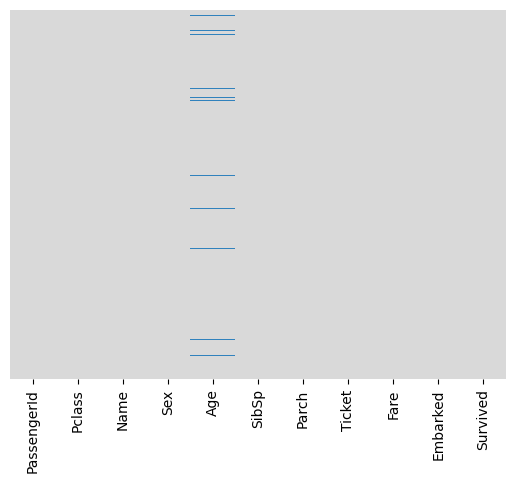

In [74]:
sns.heatmap(df.isnull() , yticklabels=False , cbar=False , cmap='tab20c_r')
plt.show()
 # we can see there is null values in age column

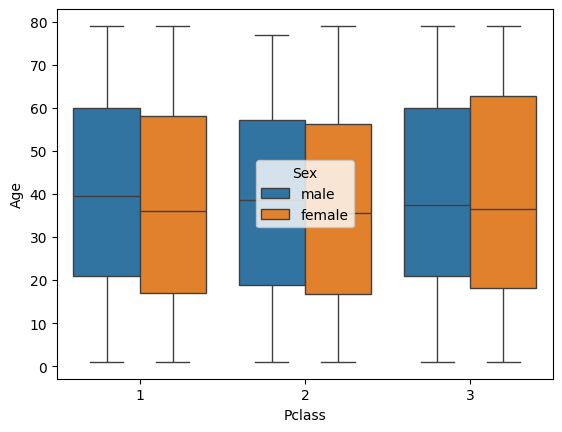

In [75]:
# we can direct remove rows where null value and can put mean of age column in place of null values
# but as we know we have the person class 1 , 2 and 3 so here we find median of age of each class person
# then put value according to Pclass in each missing place as
# here we use box plot to see median value of age of each class person as

sns.boxplot(x = 'Pclass', y = 'Age' , data = df , hue = 'Sex')
plt.show()

In [76]:
# here we find median of age for each pclass as
median_age_by_pclass = df.groupby('Pclass')['Age'].median()
print(median_age_by_pclass)
print(type(median_age_by_pclass))
print(median_age_by_pclass[1])
print(median_age_by_pclass[2])
print(median_age_by_pclass[3])

Pclass
1    37.0
2    37.0
3    37.0
Name: Age, dtype: float64
<class 'pandas.core.series.Series'>
37.0
37.0
37.0


In [77]:
# here we can see the median is 37 for all but here i create my own function for practice to enter 37 age
# for pclass 1 and 36 for p class 2 and 35 for pclass 3 as

def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 3
    else:
      return 35
  else:
    return Age
df['Age'] = df[['Age' , 'Pclass']].apply(impute_age , axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   float64
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


<ipython-input-77-be061f376291>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-77-be061f376291>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


**as we can see in upper cell our remaining 4 columns are in object from not numeric form so we remove the Name and Ticket columns and now other remaining two columns are not numerical that are Embarked and Sex then we  convert these columns in numeric data from**

here first remove name and Ticket column as:  

In [115]:
df.drop(['Name', 'Ticket'], inplace = True , axis = 1)

In [116]:
# we observe that our passengerid column does not provide any data so we also remove PassengerId column as:
df.drop(['PassengerId'], inplace = True , axis = 1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,17,4,2,144.08,Q,1
1,1,male,60,2,2,249.04,S,0
2,3,male,64,0,0,50.31,Q,1
3,3,male,35,4,0,235.20,C,1
4,1,female,70,0,3,160.17,C,1


now we have two string column
we first change its data type from object to categoris as:

In [117]:
obj_var = ['Sex', 'Embarked']
df[obj_var] = df[obj_var].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    1000 non-null   int64   
 1   Sex       1000 non-null   category
 2   Age       1000 non-null   int64   
 3   SibSp     1000 non-null   int64   
 4   Parch     1000 non-null   int64   
 5   Fare      1000 non-null   float64 
 6   Embarked  1000 non-null   category
 7   Survived  1000 non-null   int64   
dtypes: category(2), float64(1), int64(5)
memory usage: 49.2 KB


here we check how many columns have categorical data

In [118]:
df.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

now convert categorical columns in to dummies or indicator columns
it will convert categorical value in to 0 and 1's from auto matically as:

In [119]:
sex_var = pd.get_dummies(df['Sex'], drop_first = True, dtype = int) # here sex_var is a new column of Sex in which values are in 0 and 1
embarked_var = pd.get_dummies(df['Embarked'], drop_first = True, dtype= int )# here Embarked_var is a new column of Emabarked converted into 0 and 1


In [120]:
print(sex_var.head())
print(embarked_var.head())
# here we can see our sex_var column is converted as 0 and 1 data for male
# our our Embarked column is converted into Q and S comlumns in 0 and 1 data

   male
0     1
1     1
2     1
3     1
4     0
   Q  S
0  1  0
1  0  1
2  1  0
3  0  0
4  0  0


now put these new columns into out data set and remove older Sex and Embarked column as:

In [121]:
df = pd.concat([df , sex_var , embarked_var] , axis = 1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,male,Q,S
0,3,male,17,4,2,144.08,Q,1,1,1,0
1,1,male,60,2,2,249.04,S,0,1,0,1
2,3,male,64,0,0,50.31,Q,1,1,1,0
3,3,male,35,4,0,235.20,C,1,1,0,0
4,1,female,70,0,3,160.17,C,1,0,0,0


now remove Sex and Embarked column as:

In [122]:
df.drop(['Sex' , 'Embarked'] , axis = 1 , inplace = True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,3,17,4,2,144.08,1,1,1,0
1,1,60,2,2,249.04,0,1,0,1
2,3,64,0,0,50.31,1,1,1,0
3,3,35,4,0,235.20,1,1,0,0
4,1,70,0,3,160.17,1,0,0,0


In [123]:
df.select_dtypes(include=["number"]).head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,3,17,4,2,144.08,1,1,1,0
1,1,60,2,2,249.04,0,1,0,1
2,3,64,0,0,50.31,1,1,1,0
3,3,35,4,0,235.20,1,1,0,0
4,1,70,0,3,160.17,1,0,0,0


now our data is in numerical form

now our data is ready to give to model as :

# first we split our data into x and y

In [124]:
x = df.drop(['Survived'] , axis = 1)
y = df['Survived']

# now use x and y variable to split data in to x_train, y_train, x_test , y_test as:

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

now import logisticregression algorithm to train the model as:

In [126]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
# our model is trained according to that data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

our model is trained according to that data :

now predict the result accound to to data x_test as :

In [127]:
# prediction result save in other variable to find the accuracy of model
y_pred = logmodel.predict(x_test)
print(y_pred)

[1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 0]


now find score of accuracy of our model through predicted data that is save in y_pred as:

In [128]:
from sklearn.metrics import classification_report,accuracy_score
logmodel_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print(logmodel_accuracy,'%')

49.33 %
